In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [60]:
data_train = pd.read_csv("credit_train.csv")
data_test = pd.read_csv("credit_test.csv")

In [5]:
data_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
data_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [7]:
data_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
data_test.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


Датасет содержит информацию о кредитах

Удалим полностью пустые строки

In [53]:
data_train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [61]:
data_train.dropna(axis=0, how="all", inplace=True)

In [17]:
data_test.isna().sum()

Loan ID                          353
Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [62]:
data_test.dropna(axis=0, how="all", inplace=True)

<ipython-input-20-3446d3bfe2a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_train.corr()


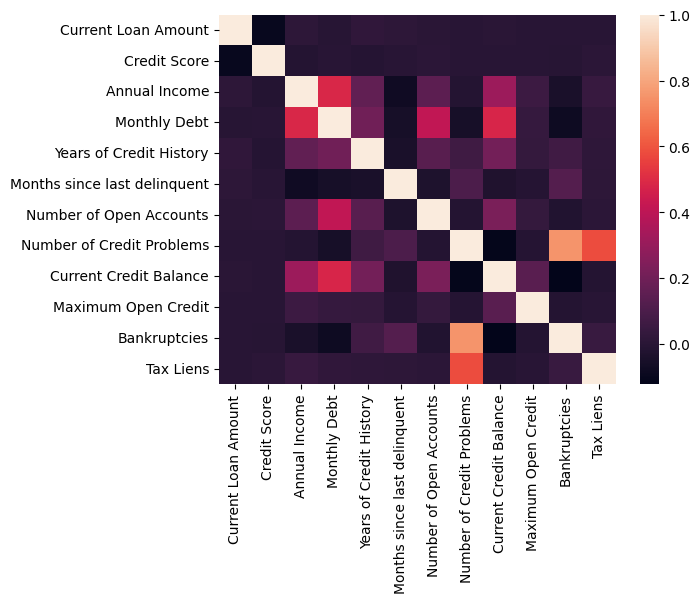

In [20]:
import seaborn as sns
corr_matrix = data_train.corr()
sns.heatmap(corr_matrix)
plt.show()

Больше всего прослеживается корреляция наблюдается у признака 'Number of Credit Problems' c признаками 'Bankruptcies' и 'Tax Liens'

Рассмотрим вариант если брать Bankruptcies за целевую переменную

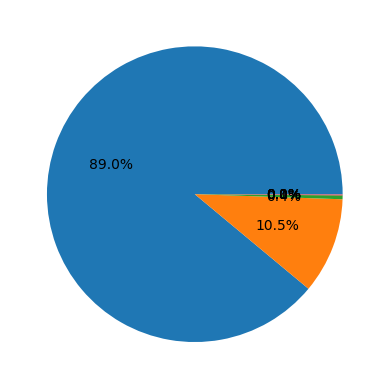

In [22]:
plt.pie(data_train["Bankruptcies"].value_counts(), autopct="%1.1f%%");

Наблюдается сильный дисбаланс классов, чтобы решить эту проблемму можно продублировать минорные классы, сократить мажорные или найти новые данные по этим классам, но в рамках экзамена это сделать не возможно

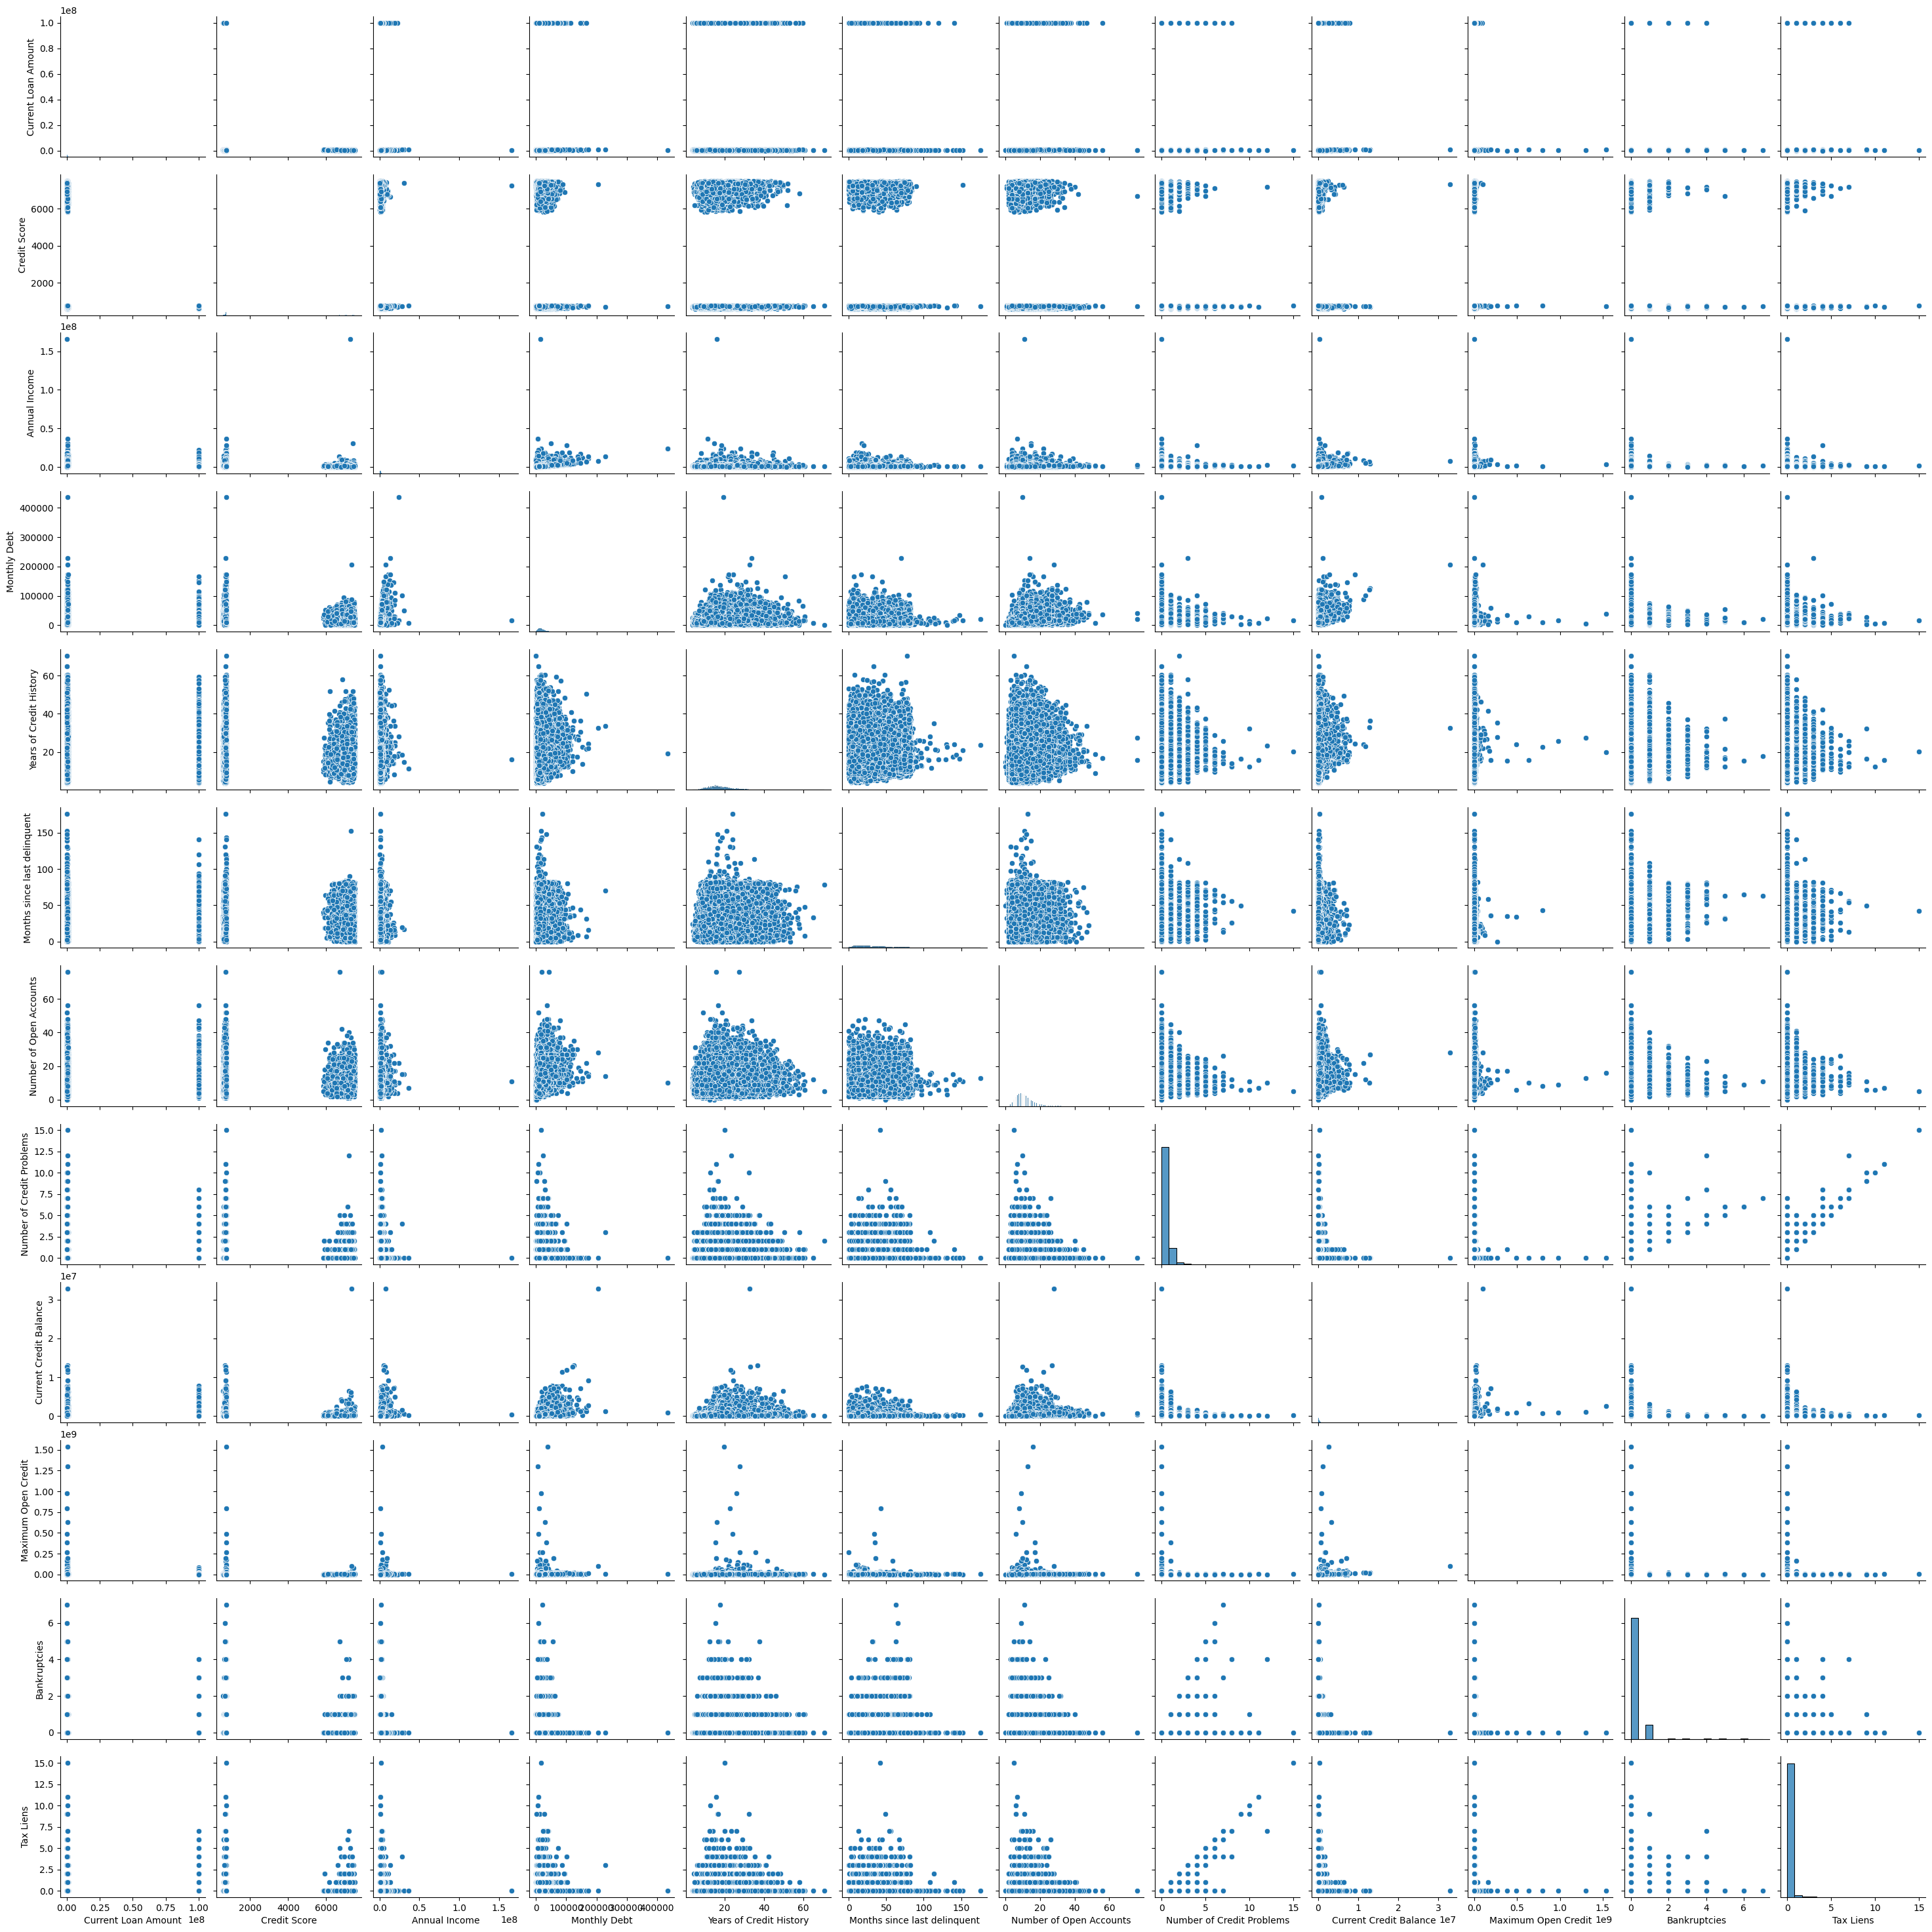

In [23]:
sns.pairplot(data_train)
plt.show()

Наблюдается зависимости пропорционального роста у признака 'Number of Credit Problems' c признаками 'Bankruptcies' и 'Tax Liens', что подтверждает выводы сделаные из тепловой карты корреляции признаков

Полностью отчистим датасет от Null значений, потеряв минимально данных

In [27]:
data_train.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [63]:
data_train.drop(columns=["Loan ID", "Loan Status", "Customer ID", "Credit Score", "Annual Income", "Years in current job", "Months since last delinquent"], inplace = True)

In [57]:
data_train.dropna(axis=0, how="any", inplace = True)


In [33]:
data_train.isna().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [65]:
data_test.drop(columns=["Loan ID", "Customer ID", "Credit Score", "Annual Income", "Years in current job", "Months since last delinquent"], inplace = True)
data_test.dropna(axis=0, how="any", inplace = True)

Переведем строковые значения в числовые

In [66]:
data_train = data_train.apply(lambda x: pd.factorize(x)[0])
data_test = data_test.apply(lambda x: pd.factorize(x)[0])

In [67]:
X_train, y_train = data_train.drop(columns=["Bankruptcies"]), data_train["Bankruptcies"]
X_test, y_test = data_test.drop(columns=["Bankruptcies"]), data_test["Bankruptcies"]

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.1232711966325917